In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [3]:
data = pd.read_csv("iris.csv")
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
X = data.drop('species', axis=1)
y = data['species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [17]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = nb.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

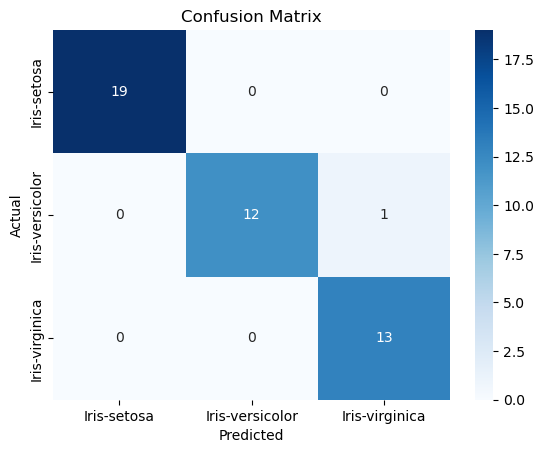

In [27]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=nb.classes_,
            yticklabels=nb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
for i, label in enumerate(nb.classes_):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    print(f"\nClass: {label}")
    print("TP:", TP)
    print("FP:", FP)
    print("FN:", FN)
    print("TN:", TN)


Class: Iris-setosa
TP: 19
FP: 0
FN: 0
TN: 26

Class: Iris-versicolor
TP: 12
FP: 0
FN: 1
TN: 32

Class: Iris-virginica
TP: 13
FP: 1
FN: 0
TN: 31


In [31]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777

In [33]:
error_rate = 1 - accuracy
error_rate

0.022222222222222254

In [35]:
precision = precision_score(y_test, y_pred, average='macro')
precision

0.9761904761904763

In [37]:
recall = recall_score(y_test, y_pred, average='macro')
recall

0.9743589743589745

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [41]:
cv_scores = cross_val_score(nb, X, y, cv=5)
cv_scores

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [43]:
nb.predict_proba(X_test[:5])

array([[4.15880005e-088, 9.95527834e-001, 4.47216606e-003],
       [1.00000000e+000, 1.31031235e-013, 2.21772205e-020],
       [9.83170191e-285, 2.70138564e-012, 1.00000000e+000],
       [9.54745274e-092, 9.74861431e-001, 2.51385686e-002],
       [1.08679560e-103, 8.31910700e-001, 1.68089300e-001]])